<a href="https://colab.research.google.com/github/0ace-jk/atividades_ebac/blob/main/mod_17_atividade_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [13]:
features = pd.read_csv('./input/features.txt', sep=r'\s+', header=None, names=['index', 'feature'])
features = features['feature']
features.index += 1

In [14]:
subject_train = pd.read_csv('/content/input/train/subject_train.txt', sep=r'\s+', header=None, names=['subject'])
X_train = pd.read_csv('/content/input/train/X_train.txt', sep=r'\s+', header=None)

X_train['subject'] = subject_train['subject']

X_train.columns = list(features) + ['subject']

X_train.set_index(['subject', X_train.index], inplace=True)

display(X_train.head())

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
subject                                                              
1       0           0.288585          -0.020294          -0.132905   
        1           0.278419          -0.016411          -0.123520   
        2           0.279653          -0.019467          -0.113462   
        3           0.279174          -0.026201          -0.123283   
        4           0.276629          -0.016570          -0.115362   

           tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
subject                                                           
1       0         -0.995279         -0.983111         -0.913526   
        1         -0.998245         -0.975300         -0.960322   
        2         -0.995380         -0.967187         -0.978944   
        3         -0.996091         -0.983403         -0.990675   
        4         -0.998139         -0.980817         -0.990482   

           tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
subject                                                           
1       0         -0.995112         -0.983185         -0.923527   
        1         -0.998807         -0.974914         -0.957686   
        2         -0.996520         -0.963668         -0.977469   
        3         -0.997099         -0.982750         -0.989302   
        4         -0.998321         -0.979672         -0.990441   

           tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
subject                      ...                                    
1       0         -0.934724  ...                        -0.074323   
        1         -0.943068  ...                         0.158075   
        2         -0.938692  ...                         0.414503   
        3         -0.938692  ...                         0.404573   
        4         -0.942469  ...                         0.087753   

           fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
subject                                                                       
1       0                        -0.298676                        -0.710304   
        1                        -0.595051                        -0.861499   
        2                        -0.390748                        -0.760104   
        3                        -0.117290                        -0.482845   
        4                        -0.351471                        -0.699205   

           angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
subject                                                                        
1       0                    -0.112754                              0.030400   
        1                     0.053477                             -0.007435   
        2                    -0.118559                              0.177899   
        3                    -0.036788                             -0.012892   
        4                     0.123320                              0.122542   

           angle(tBodyGyroMean,gravityMean)  \
subject                                       
1       0                         -0.464761   
        1                         -0.732626   
        2                          0.100699   
        3                          0.640011   
        4                          0.693578   

           angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
subject                                                                 
1       0                             -0.018446             -0.841247   
        1                              0.703511             -0.844788   
        2                              0.808529             -0.848933   
        3                             -0.485366             -0.848649   
        4                             -0.615971             -0.847865   

           angle(Y,gravityMean)  angle(Z,gravityMean)  
subject                                                
1       0              0.17

In [15]:
subject_test = pd.read_csv('/content/input/test/subject_test.txt', sep=r'\s+', header=None, names=['subject'])
X_test = pd.read_csv('/content/input/test/X_test.txt', sep=r'\s+', header=None)

X_test['subject'] = subject_test['subject']

X_test.columns = list(features) + ['subject']

X_test.set_index(['subject', X_test.index], inplace=True)

display(X_test.head())

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
subject                                                              
2       0           0.257178          -0.023285          -0.014654   
        1           0.286027          -0.013163          -0.119083   
        2           0.275485          -0.026050          -0.118152   
        3           0.270298          -0.032614          -0.117520   
        4           0.274833          -0.027848          -0.129527   

           tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
subject                                                           
2       0         -0.938404         -0.920091         -0.667683   
        1         -0.975415         -0.967458         -0.944958   
        2         -0.993819         -0.969926         -0.962748   
        3         -0.994743         -0.973268         -0.967091   
        4         -0.993852         -0.967445         -0.978295   

           tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
subject                                                           
2       0         -0.952501         -0.925249         -0.674302   
        1         -0.986799         -0.968401         -0.945823   
        2         -0.994403         -0.970735         -0.963483   
        3         -0.995274         -0.974471         -0.968897   
        4         -0.994111         -0.965953         -0.977346   

           tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
subject                      ...                                    
2       0         -0.894088  ...                         0.071645   
        1         -0.894088  ...                        -0.401189   
        2         -0.939260  ...                         0.062891   
        3         -0.938610  ...                         0.116695   
        4         -0.938610  ...                        -0.121711   

           fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
subject                                                                       
2       0                        -0.330370                        -0.705974   
        1                        -0.121845                        -0.594944   
        2                        -0.190422                        -0.640736   
        3                        -0.344418                        -0.736124   
        4                        -0.534685                        -0.846595   

           angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
subject                                                                        
2       0                     0.006462                              0.162920   
        1                    -0.083495                              0.017500   
        2                    -0.034956                              0.202302   
        3                    -0.017067                              0.154438   
        4                    -0.002223                             -0.040046   

           angle(tBodyGyroMean,gravityMean)  \
subject                                       
2       0                         -0.825886   
        1                         -0.434375   
        2                          0.064103   
        3                          0.340134   
        4                          0.736715   

           angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
subject                                                                 
2       0                              0.271151             -0.720009   
        1                              0.920593             -0.698091   
        2                              0.145068             -0.702771   
        3                              0.296407             -0.698954   
        4                             -0.118545             -0.692245   

           angle(Y,gravityMean)  angle(Z,gravityMean)  
subject                                                
2       0              0.27

In [16]:
X_train.to_csv('/content/csv/train/X_train.csv')
X_test.to_csv('/content/csv/test/X_test.csv')

In [17]:
X_train = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

X_test = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [18]:
y_train = pd.read_csv('/content/input/train/y_train.txt', sep=r'\s+', header=None, names=['activity'])
y_test = pd.read_csv('/content/input/test/y_test.txt', sep=r'\s+', header=None, names=['activity'])

In [19]:
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=4)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

# ccp_alphas = ccp_alphas[::5]

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [20]:
%%time

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha, random_state=4).fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

CPU times: user 10.6 s, sys: 7.71 ms, total: 10.6 s
Wall time: 10.7 s


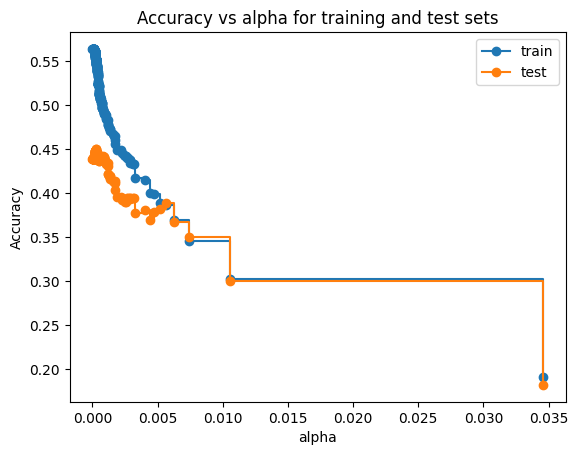

In [21]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [22]:

best_tree_index = np.argmax(test_scores)

best_ccp_alpha = ccp_alphas[best_tree_index]
best_accuracy = test_scores[best_tree_index]

print(f"The best ccp_alpha is: {best_ccp_alpha}")
print(f"The best accuracy on the test set is: {best_accuracy}")

The best ccp_alpha is: 0.000261784704614439
The best accuracy on the test set is: 0.4502884289107567


In [23]:
X_train = pd.read_csv('/content/csv/train/X_train.csv', index_col=[0, 1])
X_test = pd.read_csv('/content/csv/test/X_test.csv', index_col=[0, 1])

X_train = X_train[[
        'tBodyAcc-mean()-X',
        'tBodyAcc-mean()-Y',
        'tBodyAcc-mean()-Z',
        'tGravityAcc-mean()-X',
        'tGravityAcc-mean()-Y',
        'tGravityAcc-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'fBodyAcc-mean()-X',
        'fBodyAcc-mean()-Y',
        'fBodyAcc-mean()-Z',
        'fBodyAccJerk-mean()-X',
        'fBodyAccJerk-mean()-Y',
        'fBodyAccJerk-mean()-Z',
        'fBodyAccJerk-mean()-X',
        'fBodyAccJerk-mean()-Y',
        'fBodyAccJerk-mean()-Z'
]]

X_test = X_test[[
        'tBodyAcc-mean()-X',
        'tBodyAcc-mean()-Y',
        'tBodyAcc-mean()-Z',
        'tGravityAcc-mean()-X',
        'tGravityAcc-mean()-Y',
        'tGravityAcc-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'tBodyAccJerk-mean()-X',
        'tBodyAccJerk-mean()-Y',
        'tBodyAccJerk-mean()-Z',
        'fBodyAcc-mean()-X',
        'fBodyAcc-mean()-Y',
        'fBodyAcc-mean()-Z',
        'fBodyAccJerk-mean()-X',
        'fBodyAccJerk-mean()-Y',
        'fBodyAccJerk-mean()-Z',
        'fBodyAccJerk-mean()-X',
        'fBodyAccJerk-mean()-Y',
        'fBodyAccJerk-mean()-Z'
]]

In [24]:
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=4)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

# ccp_alphas = ccp_alphas[::5]

In [28]:
%%time

# ccp_alphas = ccp_alphas[::5]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha, random_state=4).fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

CPU times: user 4.57 s, sys: 4.93 ms, total: 4.57 s
Wall time: 4.63 s


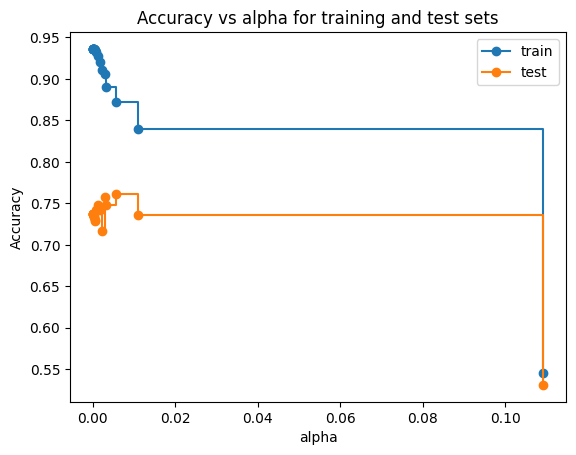

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [30]:
best_tree_index = np.argmax(test_scores)

best_ccp_alpha = ccp_alphas[best_tree_index]
best_accuracy = test_scores[best_tree_index]

print(f"The best ccp_alpha is: {best_ccp_alpha}")
print(f"The best accuracy on the test set is: {best_accuracy}")

The best ccp_alpha is: 0.005756524713951269
The best accuracy on the test set is: 0.7607736681370886


## Decidi adicionar variáveis relacionadas a média dos dados, com isso foi possível conquistar um resultado com uma melhor acurácia.